The company has developed a new webpage to increase the number of paying users for their product. They are conducting an AB test to see the results of this new page. Two equally-sized groups are created as control and treatment groups, labeled A and B. The treatment group (B) is presented with the new webpage while the control group (A) is presented with the old one, and the experiment is run. Data is collected for both groups, and then hypothesis testing is applied to determine if the difference is significant or not

In [1]:
##Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data
df = pd.read_csv(r"C:/Users/ammanana/Downloads/ab_data.csv/ab_data.csv")

In [4]:
#first 5th rows of data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [5]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
#crosstab for group and landing_page
ct = pd.crosstab(df['group'], df['landing_page'])
ct

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145313,1965


In [7]:
#checking for duplicates
df.duplicated().sum()

0

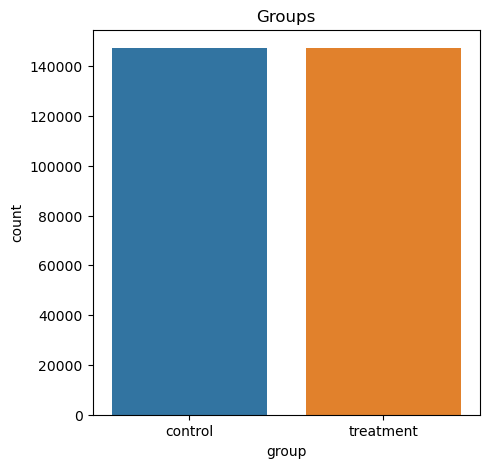

In [8]:
#visualization of control group and treatment group
plt.figure(figsize=(5,5))
sns.countplot(x='group',data=df)
plt.title('Groups')
plt.show()

- The control and treatment group has equal amount of data

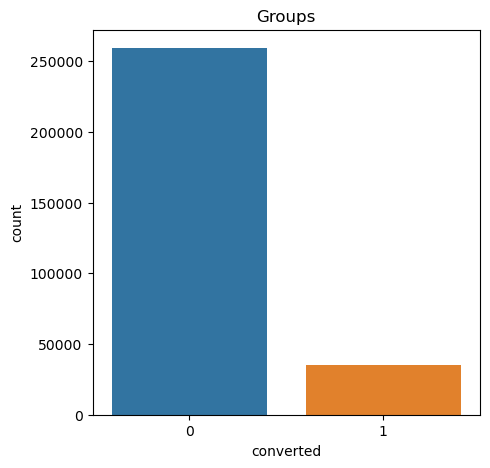

In [9]:
#visulaization of converted column.
plt.figure(figsize=(5,5))
sns.countplot(x='converted',data=df)
plt.title('Groups')
plt.show()

### CONTROL GROUP

In [10]:
#separting data of control group
control = df[df['group'] == "control"]
control

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
7,719014,48:29.5,control,old_page,0
...,...,...,...,...,...
294471,718310,44:20.4,control,old_page,0
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0


In [11]:
##Include a cust_no variable
Nc = len(control.index)
control['cust_no'] = np.arange(0,Nc)+1
control.head()

,user_id,timestamp,group,landing_page,converted,cust_no
0,851104,11:48.6,control,old_page,0,1
1,804228,01:45.2,control,old_page,0,2
4,864975,52:26.2,control,old_page,1,3
5,936923,20:49.1,control,old_page,0,4
7,719014,48:29.5,control,old_page,0,5


In [12]:
##Create cumulative conversion variable
control['converted_cumsum'] = control['converted'].cumsum()

In [13]:
control

,user_id,timestamp,group,landing_page,converted,cust_no,converted_cumsum
0,851104,11:48.6,control,old_page,0,1,0
1,804228,01:45.2,control,old_page,0,2,0
4,864975,52:26.2,control,old_page,1,3,1
5,936923,20:49.1,control,old_page,0,4,1
7,719014,48:29.5,control,old_page,0,5,1
...,...,...,...,...,...,...,...
294471,718310,44:20.4,control,old_page,0,147198,17723
294473,751197,28:38.6,control,old_page,0,147199,17723
294474,945152,51:57.1,control,old_page,0,147200,17723
294475,734608,45:03.4,control,old_page,0,147201,17723


In [14]:
## Create conversion rate variable
control['conv_rate'] = control.converted_cumsum/control.cust_no
control

,user_id,timestamp,group,landing_page,converted,cust_no,converted_cumsum,conv_rate
0,851104,11:48.6,control,old_page,0,1,0,0.000000
1,804228,01:45.2,control,old_page,0,2,0,0.000000
4,864975,52:26.2,control,old_page,1,3,1,0.333333
5,936923,20:49.1,control,old_page,0,4,1,0.250000
7,719014,48:29.5,control,old_page,0,5,1,0.200000
...,...,...,...,...,...,...,...,...
294471,718310,44:20.4,control,old_page,0,147198,17723,0.120402
294473,751197,28:38.6,control,old_page,0,147199,17723,0.120402
294474,945152,51:57.1,control,old_page,0,147200,17723,0.120401
294475,734608,45:03.4,control,old_page,0,147201,17723,0.120400


### Treatment Group

In [15]:
#separting data of treatment group
treatment = df[df['group'] == "treatment"]
treatment

,user_id,timestamp,group,landing_page,converted
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
6,679687,26:46.9,treatment,new_page,1
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1
...,...,...,...,...,...
294468,643562,20:05.5,treatment,new_page,0
294472,822004,36:46.1,treatment,new_page,0
294477,715931,40:24.5,treatment,new_page,0
294478,759899,20:29.0,treatment,new_page,0


In [16]:
##Include a cust_no variable
Nt = len(treatment.index)
treatment['cust_no'] = np.arange(0,Nt)+1
treatment.head()

,user_id,timestamp,group,landing_page,converted,cust_no
2,661590,55:06.2,treatment,new_page,0,1
3,853541,28:03.1,treatment,new_page,0,2
6,679687,26:46.9,treatment,new_page,1,3
8,817355,58:09.0,treatment,new_page,1,4
9,839785,11:06.6,treatment,new_page,1,5


In [17]:
##Create cumulative conversion variable
treatment['converted_cumsum'] = treatment['converted'].cumsum()

In [18]:
treatment

,user_id,timestamp,group,landing_page,converted,cust_no,converted_cumsum
2,661590,55:06.2,treatment,new_page,0,1,0
3,853541,28:03.1,treatment,new_page,0,2,0
6,679687,26:46.9,treatment,new_page,1,3,1
8,817355,58:09.0,treatment,new_page,1,4,2
9,839785,11:06.6,treatment,new_page,1,5,3
...,...,...,...,...,...,...,...
294468,643562,20:05.5,treatment,new_page,0,147274,17514
294472,822004,36:46.1,treatment,new_page,0,147275,17514
294477,715931,40:24.5,treatment,new_page,0,147276,17514
294478,759899,20:29.0,treatment,new_page,0,147277,17514


In [19]:
## Create conversion rate variable
treatment['conv_rate'] = treatment.converted_cumsum/treatment.cust_no
treatment

,user_id,timestamp,group,landing_page,converted,cust_no,converted_cumsum,conv_rate
2,661590,55:06.2,treatment,new_page,0,1,0,0.000000
3,853541,28:03.1,treatment,new_page,0,2,0,0.000000
6,679687,26:46.9,treatment,new_page,1,3,1,0.333333
8,817355,58:09.0,treatment,new_page,1,4,2,0.500000
9,839785,11:06.6,treatment,new_page,1,5,3,0.600000
...,...,...,...,...,...,...,...,...
294468,643562,20:05.5,treatment,new_page,0,147274,17514,0.118921
294472,822004,36:46.1,treatment,new_page,0,147275,17514,0.118920
294477,715931,40:24.5,treatment,new_page,0,147276,17514,0.118920
294478,759899,20:29.0,treatment,new_page,0,147277,17514,0.118919


- Judging by the stats above, it does look like our two designs performed very similarly, old design is performing better than the new, approx. 12.0% vs. 11.89% conversion rate.

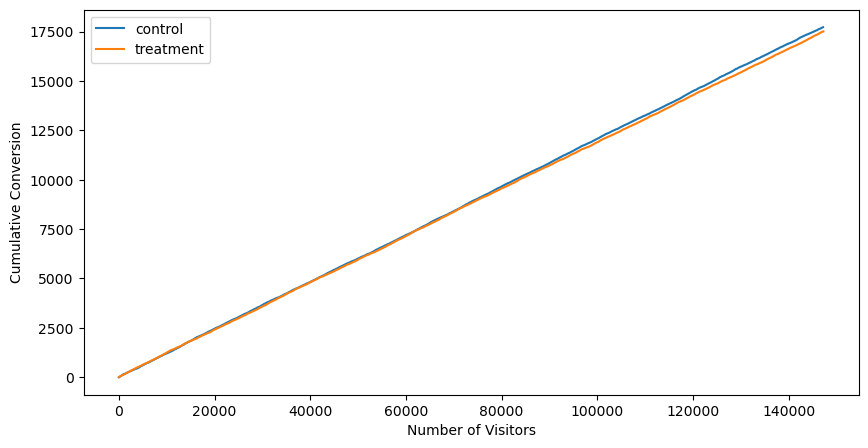

In [20]:
#visualizing conversion_rate_control and conversion_rate_treatment
fig = plt.figure(figsize = (10,5))
ax = plt.axes()
x = control.cust_no
y = control.converted_cumsum
ax.plot(x, y, label='control')

x = treatment.cust_no
y = treatment.converted_cumsum
ax.plot(x, y, label='treatment')

ax.set_xlabel("Number of Visitors")
ax.set_ylabel("Cumulative Conversion")
ax.legend(loc='best')

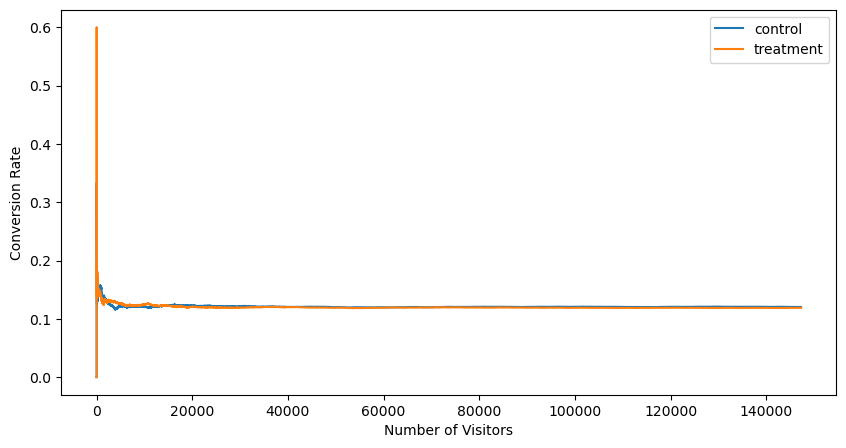

In [21]:
#visualizing conversion_rate_control and conversion_rate_treatment
fig = plt.figure(figsize = (10,5))
ax = plt.axes()
x = control.cust_no
y = control.conv_rate
ax.plot(x, y, label='control')

x = treatment.cust_no
y = treatment.conv_rate
ax.plot(x, y, label='treatment')

ax.set_xlabel("Number of Visitors")
ax.set_ylabel("Conversion Rate")
ax.legend(loc='best')

### Hypothesis Test for Difference in Proportions

In [22]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [23]:
wc = control.converted.sum() #number of visitors in control group
nc = Nc #total number of people visting the page

wt = treatment.converted.sum() #number of visitors in treatment group
nt = Nt #total number of people visting the page

successes = [wc,wt]
nobs = [nc, nt]

In [24]:
#Calculate the confidence interval 
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes,nobs, alpha=0.05)

In [25]:
print(f'ci 95% for control group: [{lower_con:.4f}, {upper_con:.4f}]')
print(f'ci 95% for treatment group: [{lower_treat:.4f}, {upper_treat:.4f}]')

ci 95% for control group: [0.1187, 0.1221]
ci 95% for treatment group: [0.1173, 0.1206]


In [26]:
z_stat, pval = proportions_ztest(successes, nobs)

In [27]:
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')

z statistic: 1.24
p-value: 0.216


Since our p-value=0.216 is way above our α=0.05 threshold, we cannot reject the Null hypothesis Hₒ, which means that our new design did not perform significantly different (let alone better) than our old one